<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>WORD CLOUD</font></h1>
<hr>

Word Clouds are visual representations of textual data that highlight the most frequent terms in the selected dataset. The size of a word in the cloud is **representative of its frequency in the text**. This type of visualization help evaluators -- and onlookers -- identify words that frequently appear in a set of interviews, documents, or other text.
<hr>

## Table of contents:
<br>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><p><a href="#ref0">Creating a Word Cloud in R</a></p></li>
<br>
<p></p>
Estimated Time Needed: <strong>15 min</strong>
</div>

<hr>


<img src="https://ibm.box.com/shared/static/p7u2b234cmowuusue1fm0oc0kbfsz0jt.png">

<center>
<font size = "2">*An example Word Cloud.*</font>
</center>

As you can see, Word Clouds are a simple, pleasing-to-the-eye way to extract and visualize what are key words in a text corpus. By the end of this notebook, you should be able to create a similar Word Cloud, using any text data that you want.

<a id='ref0'></a>
## <center>Creating a Word Cloud in R</center>

For the purposes of this notebook, we are going to use a collection of eight speeches delivered by Winston Churchill over the course of his term. If you want, you can take a look at the dataset here:

- <font size=4>[churchill_speeches.txt](https://ibm.box.com/shared/static/cmid70rpa7xe4ocitcga1bve7r0kqnia.txt) (4.3 KB)  </font> 


### Downloading data through R
You can easily download files through R utilizing the `download.file` function. Additionally, we will be creating a directory to keep things organized (using `dir.create`). You can do that by running the code cell below.

In [1]:
dir.create("/resources/data/wordcloud")
download.file("https://ibm.box.com/shared/static/cmid70rpa7xe4ocitcga1bve7r0kqnia.txt",
              destfile = "/resources/data/wordcloud/churchill_speeches.txt", quiet = TRUE)


### Installing the required packages

To create our word cloud, we are going to utilize two packages, which are available on *CRAN* (the R library repository). We are going to use mainly two packages:
 - `tm`, the Text Mining package;
 - And `wordcloud`, the Word Cloud package.

In this example, we will be using `tm` to process our larger-than-average amount of text into a format that is easily handled by R, and `wordcloud` to actually create our word cloud "plot". To install these packages, you can run the code cell below.

In [2]:
# Installing the required packages
install.packages("tm") # for text mining
install.packages("wordcloud") # word-cloud generator

Installing package into ‘/resources/common/R/Library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘NLP’, ‘slam’

Installing package into ‘/resources/common/R/Library’
(as ‘lib’ is unspecified)


Once you install the packages once, you do not need to install them again. Once they are correctly installed, you can load the libraries into R's environment by using the `library` function, like so:

In [3]:
# Loading the libraries into the environment.
library(tm)
library(wordcloud) 

Loading required package: NLP
Loading required package: RColorBrewer



### Import data as a Corpus

We now need to import our text data. To do that, we need to create a `DirSource`, which points R to the directory that houses our text files. Then we can use the `Corpus` function (from the `tm` package) to load up data from that directory.

In [4]:
# Select the directory that our text is located
dirPath <- "/resources/data/wordcloud/"

# Load the data as a corpus
speech <- Corpus(DirSource(dirPath))

We can use `inspect` to check the structure of our text corpus. Since our directory contains only one file, there will be only one document in our corpus.

In [5]:
inspect(speech) # to inspect the content

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 4380




### Cleaning the Text

**Data Cleaning** is an important preprocessing step in your analysis and is said to take up 80% of a data scientist's time. Data cleaning is the entire process of improving the overall _**quality**_ of your data, especially in preparation for data modeling or data visualizations.


**In our Data Cleaning we will:**
- Remove unnecessary whitespace
- Convert the text to lowercase
- Remove common stop words like ‘the’, “we”
- Text stemming which reduces words to their roots
- Remove numbers with removeNumbers argument
- Remove punctuation with removePunctuation argument

In [6]:
# Convert the text to lower case
speech <- tm_map(speech, content_transformer(tolower))

# Remove numbers
speech <- tm_map(speech, removeNumbers)

# Remove english common stopwords
speech <- tm_map(speech, removeWords, stopwords("english"))

# Remove your own stop word
# specify your stopwords as a character vector
speech <- tm_map(speech, removeWords, c("floccinaucinihilipification", "squirrelled")) 

# Remove punctuations
speech <- tm_map(speech, removePunctuation)

# Eliminate extra white spaces
speech <- tm_map(speech, stripWhitespace)



### Generating a term-document matrix

A document matrix is a table containing the frequency of the words. Column names are words and row names are the documents inside our corpus. The function `TermDocumentMatrix` is used to create document matrices.

In [7]:
# Create a Term Document Matrix
dtm <- TermDocumentMatrix(speech)

# Matrix transformation
m <- as.matrix(dtm)

#Sort it to show the most frequent words
v <- sort(rowSums(m),decreasing=TRUE)

#transform to a data frame
d <- data.frame(word = names(v),freq=v)
head(d, 10)

           word freq
shall     shall   11
fight     fight    7
may         may    6
will       will    6
europe   europe    5
upon       upon    5
victory victory    5
war         war    5
can         can    4
many       many    4


### Generating a Word Cloud
Finally, we will use the `wordcloud` function to generate our word cloud "plot". The word clouds generated by the `worldcloud` function are highly customizable. You can customize your word cloud by changing the function's many parameters.
<div class="alert alert-success alert-success" style="margin-top: 20px">
## Arguments of the word cloud generator function :
`words` : The words to be plotted

`freq` : The frequencies of the words.

`min.freq` : The words with frequencies below this number will not be plotted.

`max.words` : The maximum number of words to be plotted in the image.

`random.order` : If true, plots word in a random order. If false, they will be plotted in decreasing frequency.

`rot.per` : The proportion of words with 90 degree rotation (vertical text)

`colors` : The color keywords (or values) from least to most frequent. To exemplify, colors=“black” will plot the cloud using only a single color.


Let's generate a word cloud using our matrix. We can generate a really simple word cloud using only 2 parameters, `words` and `freq`.

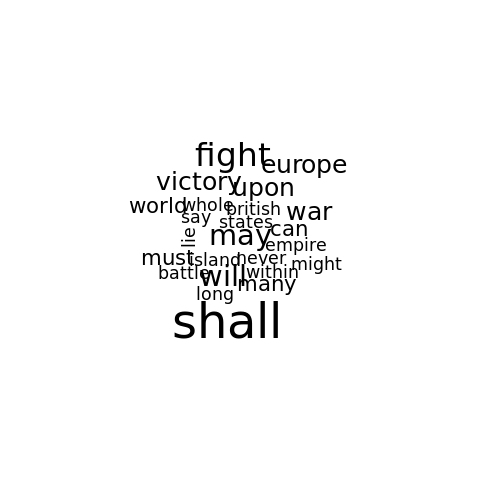

In [8]:
wordcloud(words = d$word, freq = d$freq)

It's all black and has few words. Let's see what adding `min.freq` with the value 1 will do to our word cloud.

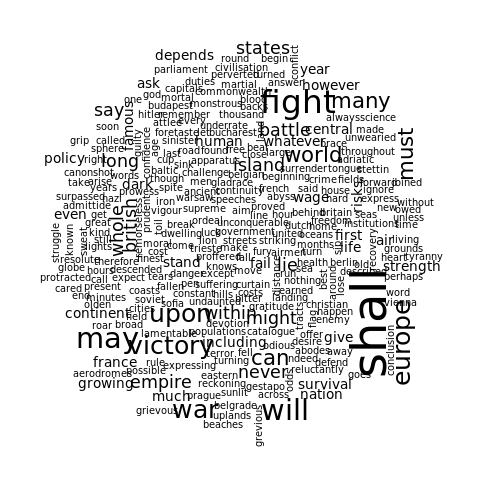

In [9]:
wordcloud(words = d$word, freq = d$freq, min.freq=1)

Now our word cloud is taking shape. Let's try limiting the number of words to make it more readable. We need to use the `max.words` parameter for this.

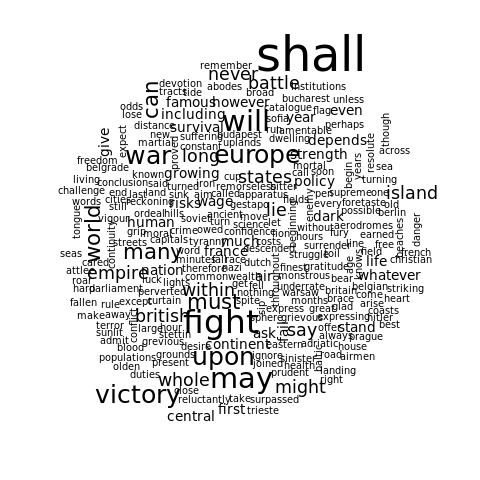

In [10]:
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
                    max.words=250)

Plain black is not that pleasing to the human eye. Let's add some colors to our word cloud using the `colors` parameter:

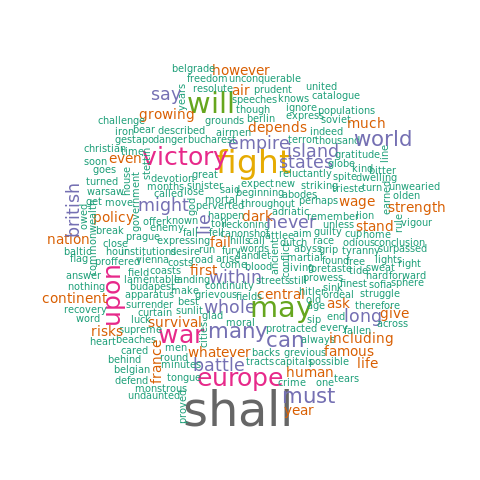

In [11]:
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
                    max.words=250, colors=brewer.pal(8, "Dark2"))

Nice! We can make our word cloud to have the most popular words in the center adding the `random.order` parameter with the value `false`. If this parameter is not included, it defaults to true.

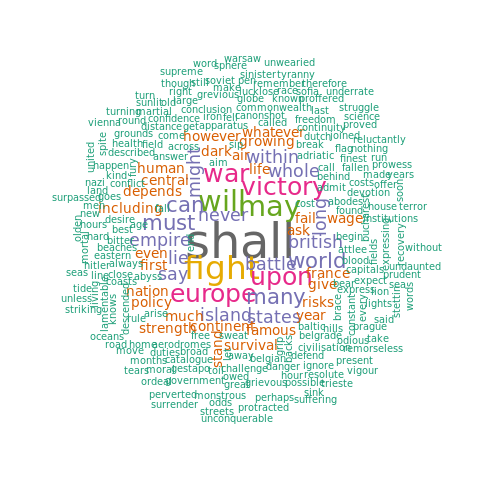

In [12]:
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
                    max.words=250, colors=brewer.pal(8, "Dark2"),
                    random.order = FALSE )

As you can see, both word clouds look great -- which one is better for your uses is up to your preference.

This is the end of the Word Cloud notebook. Hopefully, you now understand what Word Clouds are, and how to create one using R. Thank you for reading, and good luck on your studies. 

### About the Author:  
Hi! It's [Francisco Magioli](https://www.linkedin.com/in/franciscomagioli), [Mandeep Kaur](https://www.linkedin.com/in/mandeep-kaur-72900394?trk=nav_responsive_tab_profile_pic) and [Walter Gomes](https://www.linkedin.com/in/walter-gomes-de-amorim-junior-624726121), the authors of this notebook. We hope you found R easy to learn! There's lots more to learn about R but you're well on your way. Feel free to connect with us if you have any questions.

<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).